In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mlp
import tensorflow as tf
from tensorflow import keras
import os
import cv2

In [2]:
train_dir="/home/dinesh/Desktop/machinelearning/dataset"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset ='training'
)

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='validation')

Found 3067 images belonging to 2 classes.
Found 766 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
batch_size=32

In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
 7/95 [=>............................] - ETA: 2:02 - loss: 0.6935 - acc: 0.5268

/home/dinesh/.local/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 148s 2s/step - loss: 0.4722 - acc: 0.7638 - val_loss: 0.2815 - val_acc: 0.8954
Epoch 2/10
95/95 [==============================] - 131s 1s/step - loss: 0.3421 - acc: 0.8682 - val_loss: 0.2538 - val_acc: 0.9090
Epoch 3/10
95/95 [==============================] - 135s 1s/step - loss: 0.3138 - acc: 0.8731 - val_loss: 0.2722 - val_acc: 0.8872
Epoch 4/10
95/95 [==============================] - 153s 2s/step - loss: 0.3231 - acc: 0.8662 - val_loss: 0.2336 - val_acc: 0.9185
Epoch 5/10
95/95 [==============================] - 146s 2s/step - loss: 0.2912 - acc: 0.8876 - val_loss: 0.3260 - val_acc: 0.8804
Epoch 6/10
95/95 [==============================] - 145s 2s/step - loss: 0.2763 - acc: 0.8903 - val_loss: 0.2915 - val_acc: 0.8995
Epoch 7/10
95/95 [==============================] - 130s 1s/step - loss: 0.2661 - acc: 0.8969 - val_loss: 0.2233 - val_acc: 0.9035
Epoch 8/10
95/95 [==============================] - 156s 2s/step - loss: 0.2745 - acc: 0.8876 

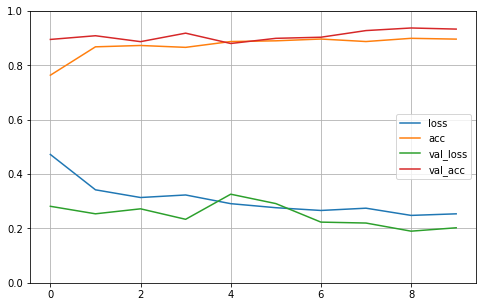

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
model.save("face2.h5")

In [11]:
from keras.models import load_model

In [12]:
model=load_model("face2.h5")

In [13]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('model.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('nomask1.jpeg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)

print (classes)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]]


In [14]:
 face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(-1)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [15]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=img[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        result=model.predict_classes(reshaped)
        print(result)

        #label=np.argmax(result,axis=1)[0]
        print(result[0][0])
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[result[0][0]],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[result[0][0]],-1)
        cv2.putText(img, labels_dict[result[0][0]], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[1]]
1
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
[[0]]
0
